# Final Checkpoint

##### In this Final Checkpoint we are going to work on the Heart Attack Dataset from Kaggle : 
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv
##### The goal for this dataset is to predict which of these patients have high chances of a heart attack.

In [5]:
import pandas as pd

In [6]:
heart=pd.read_csv("Downloads/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


###### -age : Age of the patient
###### -sex : Sex of the patient (0 = female; 1 = male)
###### -cp : Chest Pain type chest pain type
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic
###### -trtbps : resting blood pressure (in mm Hg)
###### -chol : cholestoral in mg/dl fetched via BMI sensor
###### -fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
###### -restecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
###### -thalach : maximum heart rate achieved
###### -exng: exercise induced angina (1 = yes; 0 = no)
###### -oldpeak : Previous peak : ST depression value
###### -slp: the slope of the peak exercise ST segment
    0: downsloping 
    1: flat
    2: upsloping
###### -caa: number of major vessels (0-3)
###### -thall: results of the blood flow observed 
    Value 0: NULL (missing values that must be replaced)
    Value 1: fixed defect (no blood flow in some part of the heart) 
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)
###### -output : 0 = less chance of heart attack ; 1 = more chance of heart attack

## Preprocessing

In [7]:
heart.info()
heart.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart["thall"][heart["thall"]==0],heart["thall"].describe()

(48     0
 281    0
 Name: thall, dtype: int64,
 count    303.000000
 mean       2.313531
 std        0.612277
 min        0.000000
 25%        2.000000
 50%        2.000000
 75%        3.000000
 max        3.000000
 Name: thall, dtype: float64)

In [9]:
heart["thall"].replace({0:2},inplace=True)
heart['thall'][heart["thall"]==0]

Series([], Name: thall, dtype: int64)

In [10]:
sex={0:"Female", 1:"Male"}
exng={0:"No", 1:"Yes"}
fbs={1 : "True", 0  :"False"}
slp={0: "downsloping", 1: "flat", 2: "upsloping"}
thall={0:"NULL", 1: "Fixed defect", 2: "Normal blood flow", 3: "Reversible defect"}
cp={0: "typical angina",1: "atypical angina",2: "non-anginal pain",3: "asymptomatic"}
output={0: "Low chance of heart attack" ,1:"High chance of heart attack"}

data=heart.copy()

data["sex"].replace(sex,inplace=True)
data["exng"].replace(exng,inplace=True)
data["fbs"].replace(fbs,inplace=True)
data["slp"].replace(slp,inplace=True)
data["thall"].replace(thall,inplace=True)
data["cp"].replace(cp,inplace=True)
data["output"].replace(output,inplace=True)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,asymptomatic,145,233,True,0,150,No,2.3,downsloping,0,Fixed defect,High chance of heart attack
1,37,Male,non-anginal pain,130,250,False,1,187,No,3.5,downsloping,0,Normal blood flow,High chance of heart attack
2,41,Female,atypical angina,130,204,False,0,172,No,1.4,upsloping,0,Normal blood flow,High chance of heart attack
3,56,Male,atypical angina,120,236,False,1,178,No,0.8,upsloping,0,Normal blood flow,High chance of heart attack
4,57,Female,typical angina,120,354,False,1,163,Yes,0.6,upsloping,0,Normal blood flow,High chance of heart attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,typical angina,140,241,False,1,123,Yes,0.2,flat,0,Reversible defect,Low chance of heart attack
299,45,Male,asymptomatic,110,264,False,1,132,No,1.2,flat,0,Reversible defect,Low chance of heart attack
300,68,Male,typical angina,144,193,True,1,141,No,3.4,flat,2,Reversible defect,Low chance of heart attack
301,57,Male,typical angina,130,131,False,1,115,Yes,1.2,flat,1,Reversible defect,Low chance of heart attack


## Visualization

##### We will now do some visualization to see how is the data spreading

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sex', ylabel='count'>

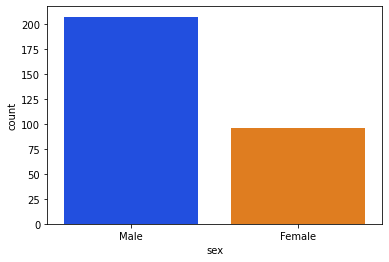

In [12]:
sns.set_palette("bright")
sns.countplot(x=data["sex"])

The majority of patients are Male : Male = 203 ; Female = 100

<AxesSubplot:xlabel='age', ylabel='Count'>

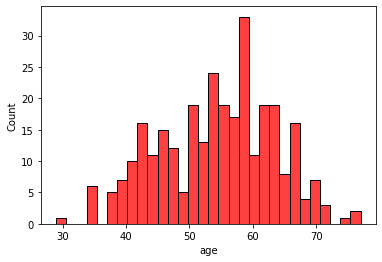

In [13]:
sns.histplot(data=data, x="age", bins=30, color='red')


The age ranges from 29 to 77. Most patients are aged between 50 and 65.

<AxesSubplot:xlabel='trtbps'>

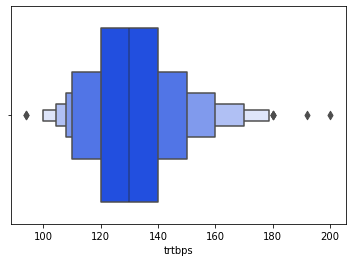

In [14]:
sns.boxenplot(x=data["trtbps"])

Most patients have a resting blood pressure that usualy varies between 120 and 140. But there are some outliers and some other minority with diffrent resting blood
pressure value :

200 and 180 are outliers, the 160-180 range and 100-120 range are some minority of patients.

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

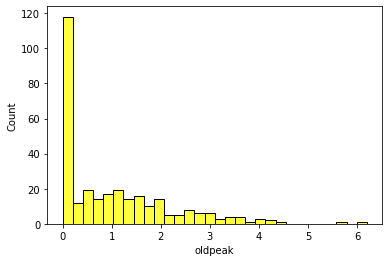

In [15]:
sns.histplot(data=data, x="oldpeak", bins=30, color='yellow')

Most patients haven't had a previous peak. Those who had a peak, the ST depression value usually doesn't exceed 2.

<AxesSubplot:xlabel='chol', ylabel='Count'>

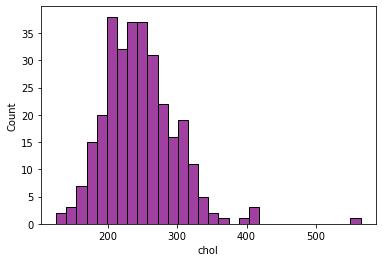

In [16]:
sns.histplot(data=data, x="chol", bins=30, color='purple')

Cholesterol levels range from 126 mg/dl to 564 mg/dl. Most patients have cholesterol level between 200 mg/dl and 300 mg/dl .


A normal cholesterol level is less than 200 mg/dl and the maximum acceptable level is 239 mg/dl. So most people have worrying cholesterol levels .

<AxesSubplot:xlabel='thall', ylabel='count'>

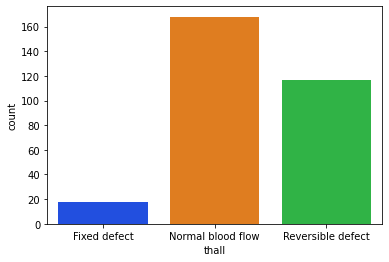

In [17]:
sns.countplot(data=data,x="thall")

Most patients (165) have a normal blood flow, 119 patients have a reversible defect and less than 20 patients have a fixed defect .

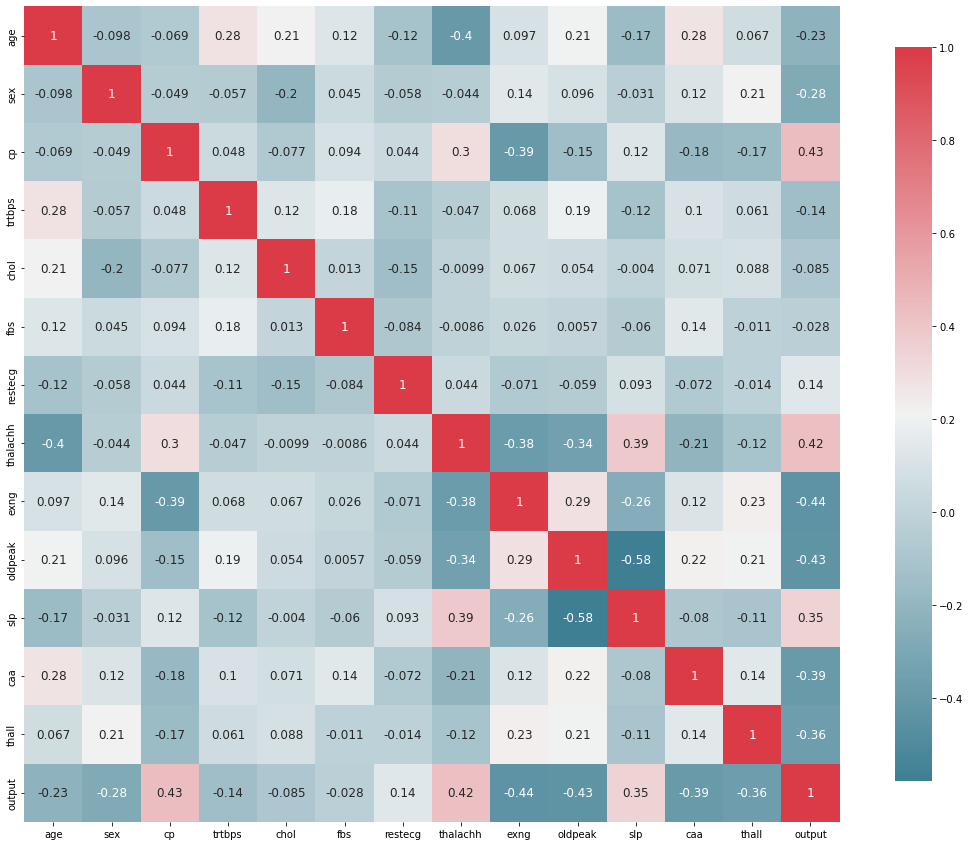

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(heart)

According to the heatmap, the output is most correlative with :

"thall" , "caa", "oldpeak" , "exng" , "cp" and "thalachh"

Text(0.5, 1.0, 'Exercice Induced Angina')

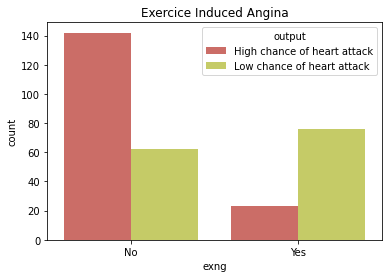

In [19]:
sns.set_palette("hls")
sns.countplot(data= data, x='exng',hue='output')
plt.title('Exercice Induced Angina / Heart Attack Chances')

Patients with no Exercice Induced Angina are more likely to have a heart attack than those suffering from the disease.

Text(0.5, 1.0, 'Previous Peak / Heart Attack Chances')

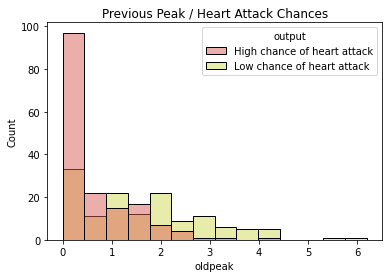

In [24]:
sns.histplot(data=data, x="oldpeak", hue="output")

plt.title('Previous Peak / Heart Attack Chances')

Patients with previous peak have less chance of heart attacks than those with no ST abnormality. In fact, more than half of patients that have a normal ST segment have higher chances of heart attacks.

Text(0.5, 1.0, 'Blood Pressure / Heart Attack Chances')

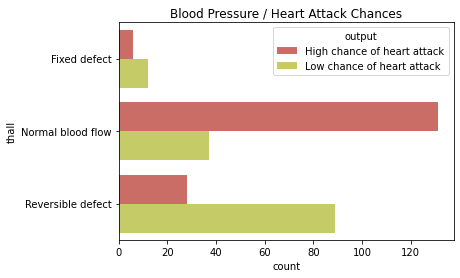

In [25]:
sns.countplot(data=data, y="thall", hue="output" )
plt.title('Blood Pressure / Heart Attack Chances')

The majority of patients have a normal blood flow but they are more likely to have a heart attack than those with reversible defect or a fixed defect.

Text(0.5, 1.0, 'Chest Pain / Heart Attack Chances')

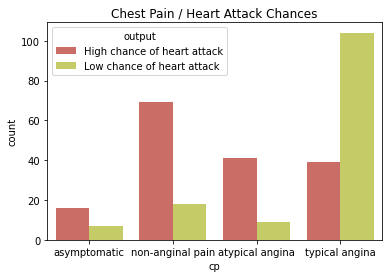

In [26]:
sns.countplot(data= data, x='cp',hue='output')
plt.title('Chest Pain / Heart Attack Chances')

Most of patients with a typical angina are safe from heart attacks. But, the majority in other categories of Chest Pain have higher chances of heart attacks .

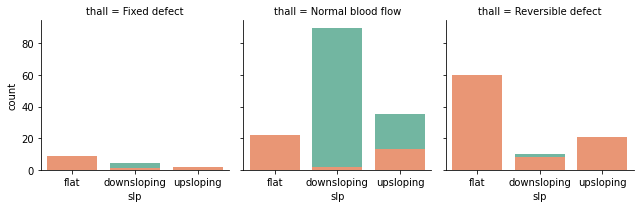

In [268]:
sns.set_palette("Set2")
g = sns.FacetGrid(data, col="thall",  hue="output")
g.map_dataframe(sns.countplot, x="slp")

Few patients have a fixed defect and the majority of them have a flat slope and are out of risk from heart attacks .


Many patients have a normal blood flow, those with a flat slope, 2 people with downsloping and half of those with upsloping are safe. The others have higher chances of heart attacks


Lastly patients with reversible defect are also numerous and almost all of the are safe : 2 people with downsloping have high chances of heart attack.

<AxesSubplot:xlabel='slp', ylabel='count'>

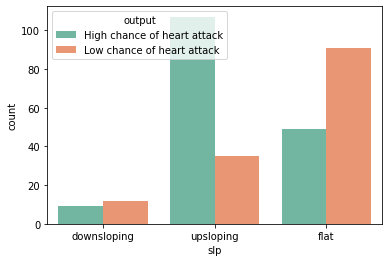

In [269]:
sns.countplot(data=data, x="slp", hue="output")

The majority of patients with upsloping and almost half of those with a downsloping have high chances of heart attacks. Many those with a flat slope are safe .

# Prediction Process

For the prediction process, we are going to try three models : Logistic Regression, KNN and Random Forest Models; then we'll see which model is more performent.

Since "Age" isn't correlative with the output and doesn't add much in the prediction process, we won't be using it with the features.

## Logistic Regression

In [536]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
#features extraction
x1 = scaler.fit_transform(heart[['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']])
y1 = heart['output']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=40)  #splitting data with test size of 30%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x1_train, y1_train)  #fitting training data
y1_pred  = logreg.predict(x1_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x1_test, y1_test)))

Accuracy=0.92


In [537]:
score = cross_val_score ( logreg, scaler.fit_transform(heart), heart.output, cv = 5)
print("Accuracy of each subset : ",score)
print("Average accuracy : ",sum(score)/5)

Accuracy of each subset :  [1. 1. 1. 1. 1.]
Average accuracy :  1.0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

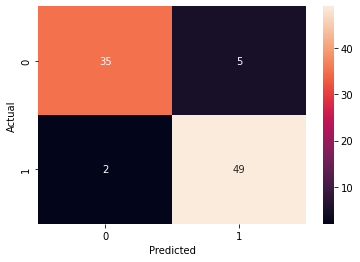

In [538]:
confusion_matrix = pd.crosstab(y1_test, y1_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

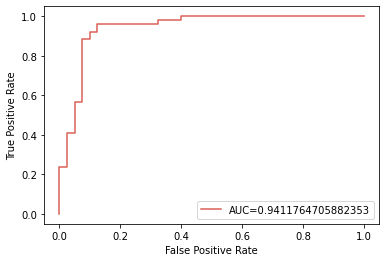

In [539]:
y1_pred_proba = logreg.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y1_pred_proba)
auc = metrics.roc_auc_score(y1_test, y1_pred_proba)

plt.plot (fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

In [540]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.91      0.96      0.93        51

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



The Logistic Regression model has an accuracy score of 92% and an AUC = 0.94 which is a good score and after applying the cross-validation algorithm, the accuracy increases to its maximum 100%

## KNN

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

x=scaler.fit_transform(heart[[ 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
y=heart['output']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=22) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.9010989010989011


In [542]:
scores = cross_val_score ( knn, scaler.fit_transform(heart), heart.output , cv = 5 )
print("Accuracy of each subset : ",scores)
print("Average accuracy : ",sum(scores)/5)

Accuracy of each subset :  [0.96721311 0.96721311 0.96721311 0.95       0.91666667]
Average accuracy :  0.9536612021857923


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

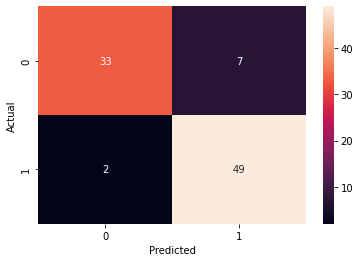

In [543]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

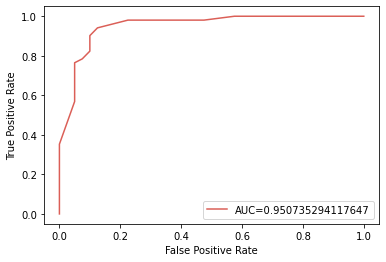

In [544]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot (fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

In [545]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



The KNN shows an of 90% and a AUC = 0.95 and when applying the cross-validation algorithm, it doesn't reach the maximum score.

## Random Forest

In [532]:
from sklearn.ensemble import RandomForestClassifier

x2=scaler.fit_transform(heart[[ 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
y2=heart['output']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=40) #split our data with test size of 20% 

clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x2_train, y2_train)  #Training our model
y2_pred=clf.predict(x2_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.9120879120879121


In [533]:
scores = cross_val_score ( clf, scaler.fit_transform(heart), heart.output , cv = 5 )
print("Accuracy of each subset : ",scores)
print("Average accuracy : ",sum(scores)/5)

Accuracy of each subset :  [1. 1. 1. 1. 1.]
Average accuracy :  1.0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

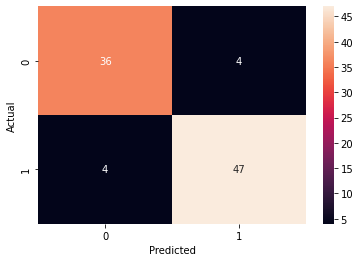

In [534]:
confusion_matrix = pd.crosstab(y2_test, y2_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

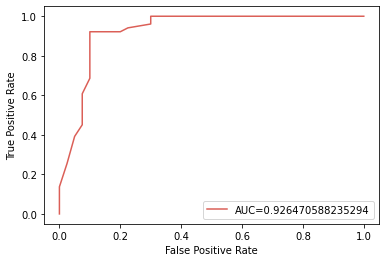

In [535]:
y2_pred_proba = clf.predict_proba(x2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred_proba)
auc = metrics.roc_auc_score(y2_test, y2_pred_proba)

plt.plot (fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

In [403]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.89      0.94      0.91        51

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



The Random Forest model has an accuracy of 91% with a AUC = 0.93 which is good and after applying the cross-validation algorithm, the accuracy increases to its maximum 100%.

## Model Selection

By looking at the accuracy, AUC and the classification report values of all models, the KNN have the lowest values.

I think that the most suited model for this prediction is the Logistic Regression model because it has the highest values of performance compared to the Random Forest and KNN model. 